In [30]:
import glob
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

result_list = glob.glob("edo_pinn_sim/*")

print("numero de arquiteturas testadas: {}".format(len(result_list)))

numero de arquiteturas testadas: 54


In [31]:
results_dict = {}

error_list = []

speed_list = []

for i, file in enumerate(result_list):

    with open(file, "rb") as f:
        results_dict[i] = pk.load(f)

    error_list.append(results_dict[i]['rmse']+results_dict[i]['max_ae'])
    speed_list.append(results_dict[i]['mean_speed_up']-results_dict[i]['std_speed_up'])

error_max = np.max(error_list)
error_min = np.min(error_list)

speed_max = np.max(speed_list)
speed_min = np.min(speed_list)

norm_error = (error_list-error_min)/(error_max-error_min)
norm_speed = (speed_list-speed_min)/(speed_max-speed_min)


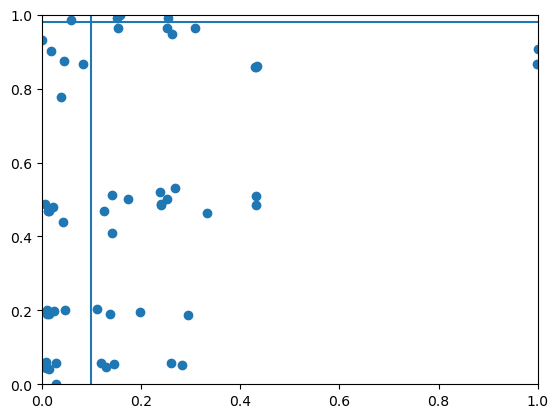

In [20]:
plt.scatter(norm_error,norm_speed)
plt.hlines(0.98,0,1)
plt.vlines(0.1,0,1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [33]:
choice = np.intersect1d(np.argwhere(norm_speed>0.98),np.argwhere(norm_error<0.1))[0]

print("Arquitetura escolhida: " + result_list[choice].split('/')[-1].split(".")[0])

Arquitetura escolhida: epochs_20000__batch_10000__arch_Elu--4__


In [36]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]


In [37]:
struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

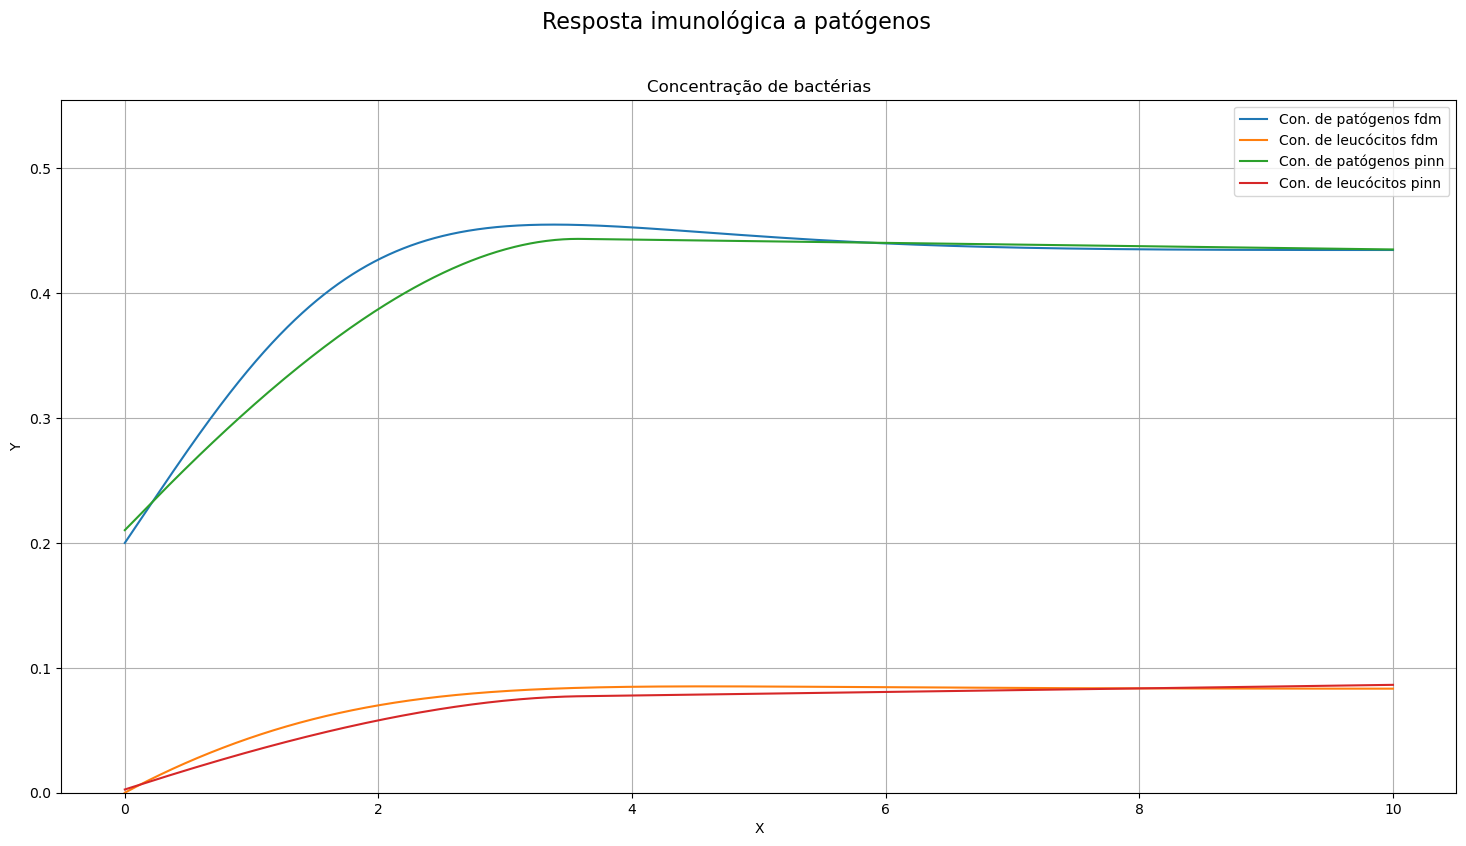

In [38]:
fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0,10,num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0,10,num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(np.linspace(0,10,num=len(Cp)), Cp_pinn, label="Con. de patógenos pinn")
ax.plot(np.linspace(0,10,num=len(Cp)), Cl_pinn, label="Con. de leucócitos pinn")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax+0.1)
ax.legend()
ax.grid()

plt.show()

In [39]:
print("Speed Up: {} +/-{}".format(results_dict[choice]["mean_speed_up"],results_dict[choice]["std_speed_up"]))

Speed Up: 151.35938819174052 +/-8.549570014006873
